In [78]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as ssig
import timeit

In [79]:
signal = np.array([-1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 0, -1, -1])
message = np.array([1, -1, 1])

In [80]:
correlation = np.zeros((signal.size - message.size))
norm_correlation = np.zeros((signal.size - message.size))
print('{0:15}{1:20}'.format('shift', 'correlation'))
for j in range(signal.size - message.size):
    for i in range(message.size):
        correlation[j] += message[i] * signal[j + i]
    norm_correlation[j] = correlation[j] / message.size
    print(f'{j}{norm_correlation[j]:20.2f}')
    #print(f'{j}{correlation[j] / message.size:20.2f}')

shift          correlation         
0               -0.33
1                0.33
2               -1.00
3                1.00
4               -1.00
5                1.00
6               -0.33
7                0.33
8               -0.33
9                0.33
10               -0.33
11                0.00
12               -0.67


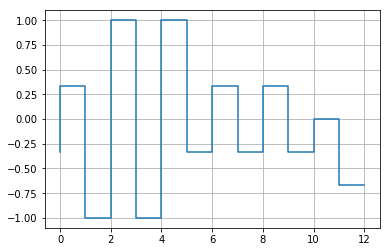

In [81]:
plt.step(range(13), norm_correlation)
plt.grid(True)

In [82]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

FFT correlation = 0.013105    Direct correlation = 0.000666


In [97]:
message.resize(signal.size)
signal2 = signal + message
wrapped1 = wrapper(ssig.correlate, signal, signal2, 'full', 'direct')
wrapped2 = wrapper(ssig.correlate, signal, signal2, 'full', 'fft')
time_dir_corr = timeit.timeit(wrapped1, number=100)
time_fft_corr = timeit.timeit(wrapped2, number=100)
print('{0:15}{1:0.6f}    {2:20}{3:0.6f}'.format('FFT correlation = ', time_fft_corr, 'Direct correlation = ', time_dir_corr))

FFT correlation = 0.013105    Direct correlation = 0.000666
